In [1]:
#pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.style.use('fivethirtyeight')
plt.rcParams['text.color'] = 'black'

#### Dicionário de Variáveis utilizadas
|Chave|Descrição|Função|
|-----|-----|-----|
|**Identificação**|
|Ano| Ano de referência|Controle|
|Trimestre| Trimestre de referência|Controle|
|UF| Estado|Controle|
|Capital| Capital da UF|Controle|
|UPA| Unidade Primária de Amostragem (UF(2) + número squencial(6) + DV(1))|Controle|
|V1008| Número do Domicílio|Controle|
|V1014| Painel - Grupo de Controle|Controle|
|V1016| Número de entrevista (1 a 5)|Controle|
|V2003| Número de ordem|Controle|
|**Características**|
|V2007| Sexo|Característica|
|V2008| Dia Nascimento|Característica|
|V20081| Mês nascimento|Característica|
|V20082| Ano nascimento|Característica|
|V2010| Raça|Característica|
|**Variáveis exploradas**|
| VD4001 | Condição em relação à força de trabalho na semana de referência para pessoas de 14 anos ou mais de idade | Descrição |
| VD4002 | Condição de ocupação na semana de referência para pessoas de 14 anos ou mais de idade | Descrição |
| VD4003 | Força de trabalho potencial para pessoas de 14 anos ou mais de idade | Descrição |
| VD4008 | Posição na ocupação no trabalho principal da semana de referência para pessoas de 14 anos ou mais de idade | Descrição |
| VD4009 | Posição na ocupação e categoria do emprego do trabalho principal da semana de referência para pessoas de 14 anos ou mais de idade | Descrição |
| VD4004A | Subocupação por insuficiência de horas efetivamente trabalhadas em todos os trabalhos | Descrição |
| V4019 |Esse negócio/empresa era registrado no Cadastro Nacional da Pessoa Jurídica - CNPJ? | Descrição |
| V4046 |Esse negócio/empresa era registrado no Cadastro Nacional da Pessoa Jurídica - CNPJ? | Descrição |
|**Auxiliares**|
|V1028| Peso do domicílio e das pessoas sem calibração|Expansão|
|V1029| Peso do domicílio e das pessoas com calibração|Expansão|
|V1033| Projeção da população por sexo e idade|Expansão|
|posest|Domínios de projeção geográficos|Expansão|


 Chave para pessoa: UPA + V1008 + V1014  + V2003 + V2007 + V2008 + V20081 + V20082 

 *PARA ESTIMAÇÃO DA POPULAÇÃO, DEVE-SE USAR AS VARIÁVEIS: V1033 e posest.*

Importação das bases

In [35]:
#determina qual diretório usar para cada sistema operacional.
import os
if os.name == 'nt': #windows
    diretorio = 'C:\\Users\\est.matheus.brasil\\Documents\\Microdados PNAD Contínua\\feather\\'

else: #linux(ou mac)
    diretorio = '/home/matheus/Microdados PNAD/feather/'

#Leitura de todas as bases com as variáveis selecionadas e criação de variáveis dinamicamente.

colunas_selecionadas = ['Ano', 'Trimestre', 'UPA', 'UF', 'V1008', 'V1014', 'V2007', 'V2008', 'V20081', 'V20082', 'V2010', #Controle e chave ID
                        'VD4001', 'VD4002', 'VD4003', 'VD4008', 'VD4009', 'VD4004A', 'V4019', 'V4046', 'VD4019',   #Variáveis de interesse
                        'V1027', 'V1028', 'V1029', 'V1033', 'posest', 'posest_sxi'] #expansão
                    
for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
                print(f'lendo PNAD{ano} {tri}')
                globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)
        if 2019 < ano < 2022:
                print(f'lendo PNAD{ano} {tri}')
                globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)
        if ano == 2022 and tri < 3:
            print(f'lendo PNAD{ano} {tri}')
            globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)

lendo PNAD2019 4
lendo PNAD2020 1
lendo PNAD2020 2
lendo PNAD2020 3
lendo PNAD2020 4
lendo PNAD2021 1
lendo PNAD2021 2
lendo PNAD2021 3
lendo PNAD2021 4
lendo PNAD2022 1
lendo PNAD2022 2


Tratamento dos dados

In [36]:
#Concatena todos os dataframes de cada ano e trimestre em uma unica tabela.

pnadc_completa = pd.concat([pnad_2019_4, 
                            pnad_2020_1, 
                            pnad_2020_2, 
                            pnad_2020_3, 
                            pnad_2020_4, 
                            pnad_2021_1, 
                            pnad_2021_2, 
                            pnad_2021_3, 
                            pnad_2021_4, 
                            pnad_2022_1, 
                            pnad_2022_2])
#Converte variável para criar ID
pnadc_completa['V2007'] = np.where(pnadc_completa['V2007'] == 'Homem', 0, 1)
#Converte variáveis para numéricas
pnadc_completa['UPA'] = pd.to_numeric(pnadc_completa['UPA'] , errors='coerce') 
pnadc_completa['V1008'] = pd.to_numeric(pnadc_completa['V1008'] , errors='coerce') 
pnadc_completa['V1014'] = pd.to_numeric(pnadc_completa['V1014'] , errors='coerce') 
pnadc_completa['V2007'] = pd.to_numeric(pnadc_completa['V2007'] , errors='coerce') 
pnadc_completa['V2008'] = pd.to_numeric(pnadc_completa['V2008'] , errors='coerce') 
pnadc_completa['V20081'] = pd.to_numeric(pnadc_completa['V20081'] , errors='coerce') 
pnadc_completa['V20082'] = pd.to_numeric(pnadc_completa['V20082'] , errors='coerce') 

#Cria chave ID e novo df
pnadc_completa = pd.DataFrame({
    #Controle
    'Ano':pnadc_completa['Ano'], 
    'Trimestre':pnadc_completa['Trimestre'],
    'UPA':pnadc_completa['UPA'],
    'UF':pnadc_completa['UF'],
    'V2007':pnadc_completa['V2007'],
    #ID  
    'ID': pnadc_completa['UPA'] + 
        pnadc_completa['V1008'] + 
        pnadc_completa['V1014'] + 
        pnadc_completa['V2007'] +
        pnadc_completa['V2008'] +
        pnadc_completa['V20081'] +
        pnadc_completa['V20082'],
    #Exploradas
    'V2010': pnadc_completa['V2010'],
    'VD4001': pnadc_completa['VD4001'],
    'VD4002': pnadc_completa['VD4002'],
    'VD4003': pnadc_completa['VD4003'],
    'VD4008': pnadc_completa['VD4008'],
    'VD4009': pnadc_completa['VD4009'],
    'VD4004A': pnadc_completa['VD4004A'],
    'V4019': pnadc_completa['V4019'],
    'V4046': pnadc_completa['V4046'],
    'VD4019': pnadc_completa['VD4019'],
    #Expansão
    'V1027': pnadc_completa['V1027'],
    'V1028': pnadc_completa['V1028'],
    'V1029': pnadc_completa['V1029'],
    'V1033': pnadc_completa['V1033'],
    'posest': pnadc_completa['posest'],
    'posest_sxi': pnadc_completa['posest_sxi']
    })

#Reverte alteração da coluna V2007 para os rótulos anteiores
pnadc_completa['V2007'] = pnadc_completa['V2007'].apply(lambda x: 'Homem' if x == 0 else 'Mulher')
# Ordernação da série histórica por ano e trimestre.
pnadc_completa.sort_values(by=['Ano', 'Trimestre'], inplace=True)
#concatena a coluna 'Ano' e 'Trimestre' em uma única coluna.
pnadc_completa['ano_tri'] = pnadc_completa['Ano'].astype(str) + 'Q' + pnadc_completa['Trimestre'].astype(str)
#Conversão da coluna ano_tri para datetime.
pnadc_completa['ano_tri'] = pd.to_datetime(pnadc_completa['ano_tri']).dt.to_period('Q')

## Descritivas

Pessoas em idade de trabalhar

In [4]:
pessoas_idade_trabalhar = (pd.crosstab(pnadc_completa['ano_tri'], pnadc_completa['VD4001'], values=pnadc_completa['V1028'], aggfunc='sum', margins=True, margins_name='Total')/ 1000).round(0).drop('Total', axis=0)

In [5]:
pessoas_idade_trabalhar[['Total']]

VD4001,Total
ano_tri,
2019Q4,168997.0
2020Q1,169427.0
2020Q2,169852.0
2020Q3,170270.0
2020Q4,170678.0
2021Q1,171084.0
2021Q2,171485.0
2021Q3,171886.0
2021Q4,172283.0


Pessoas na força e fora da força de trabalho

In [6]:
pessoas_idade_trabalhar[['Pessoas fora da força de trabalho', 'Pessoas na força de trabalho']]

VD4001,Pessoas fora da força de trabalho,Pessoas na força de trabalho
ano_tri,,
2019Q4,61579.0,107418.0
2020Q1,63164.0,106263.0
2020Q2,72573.0,97279.0
2020Q3,72234.0,98037.0
2020Q4,69042.0,101637.0
2021Q1,68746.0,102339.0
2021Q2,67270.0,104216.0
2021Q3,65456.0,106430.0
2021Q4,64525.0,107758.0


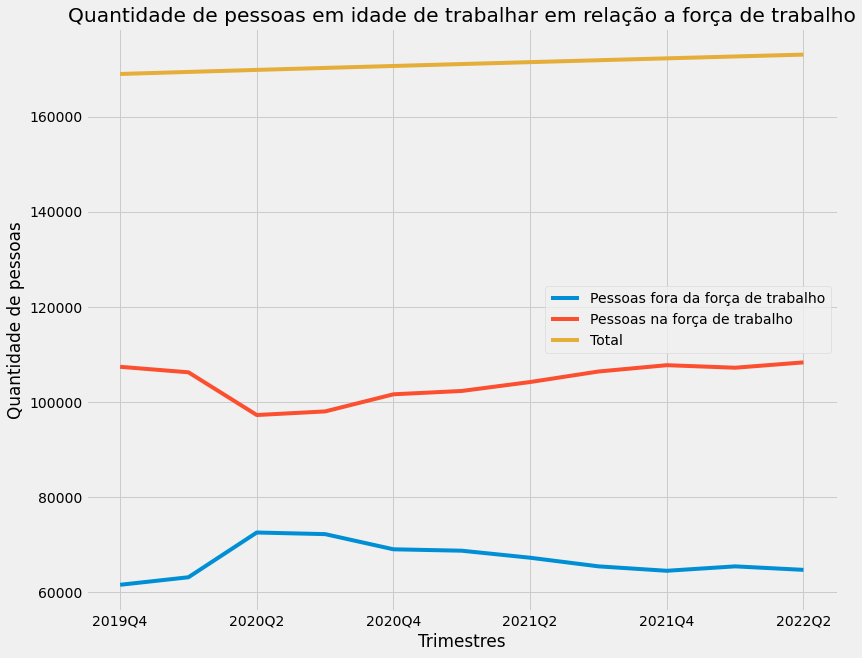

In [7]:
pessoas_idade_trabalhar.plot(kind='line', figsize=(12, 10), title = 'Quantidade de pessoas em idade de trabalhar em relação a força de trabalho',xlabel='Trimestres', ylabel='Quantidade de pessoas')
plt.legend(loc='best')
plt.show()

Pessoas ocupadas e desocupadas

In [8]:
pessoas_ocupacao = (pd.crosstab(pnadc_completa['ano_tri'], pnadc_completa['VD4002'], values=pnadc_completa['V1028'], aggfunc='sum', margins=True, margins_name='Total') / 1000).drop('Total', axis=0).round(0)

In [9]:
pessoas_ocupacao

VD4002,Pessoas desocupadas,Pessoas ocupadas,Total
ano_tri,,,
2019Q4,11903.0,95515.0,107418.0
2020Q1,13148.0,93115.0,106263.0
2020Q2,13228.0,84051.0,97279.0
2020Q3,14598.0,83439.0,98037.0
2020Q4,14412.0,87225.0,101637.0
2021Q1,15257.0,87082.0,102339.0
2021Q2,14832.0,89384.0,104216.0
2021Q3,13453.0,92976.0,106430.0
2021Q4,12011.0,95747.0,107758.0


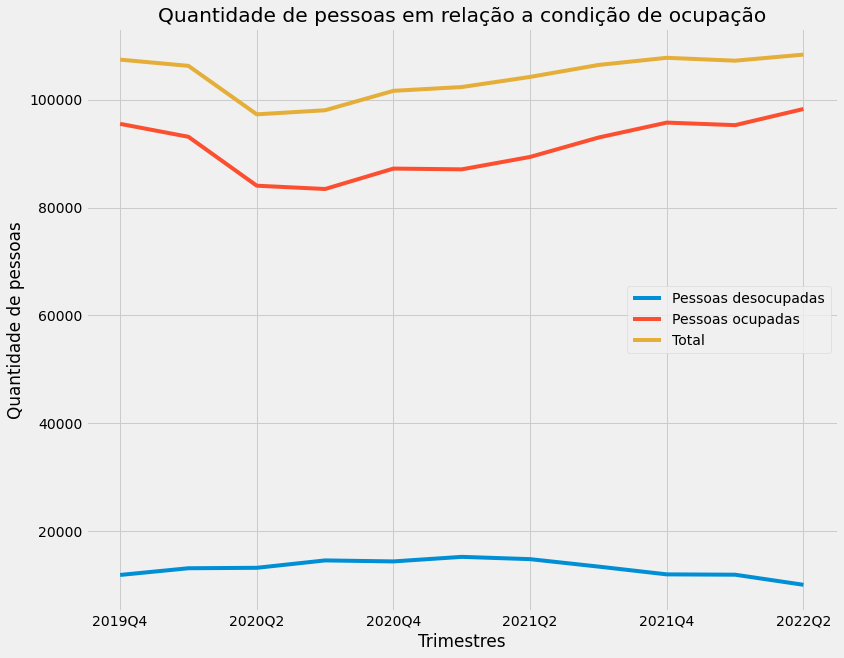

In [10]:
pessoas_ocupacao.plot(kind='line', figsize=(12, 10), title = 'Quantidade de pessoas em relação a condição de ocupação',xlabel='Trimestres', ylabel='Quantidade de pessoas')
plt.legend(loc='best')
plt.show()

Pessoas empregadas no setor público e setor privado

In [11]:
pessoas_empregadas = (pd.crosstab(pnadc_completa['ano_tri'], pnadc_completa['VD4008'], values=pnadc_completa['V1028'], aggfunc='sum', margins=True, margins_name='Total') / 1000).drop('Total', axis=0).round(0)

In [12]:
pessoas_empregadas[['Empregado no setor privado', 'Empregado no setor público (inclusive servidor estatutário e militar)', 'Total']]

VD4008,Empregado no setor privado,Empregado no setor público (inclusive servidor estatutário e militar),Total
ano_tri,,,
2019Q4,47208.0,11416.0,95515.0
2020Q1,45827.0,11389.0,93115.0
2020Q2,40525.0,11949.0,84051.0
2020Q3,40352.0,11418.0,83439.0
2020Q4,42114.0,11680.0,87225.0
2021Q1,41759.0,11409.0,87082.0
2021Q2,42703.0,11459.0,89384.0
2021Q3,45199.0,11168.0,92976.0
2021Q4,46938.0,11375.0,95747.0


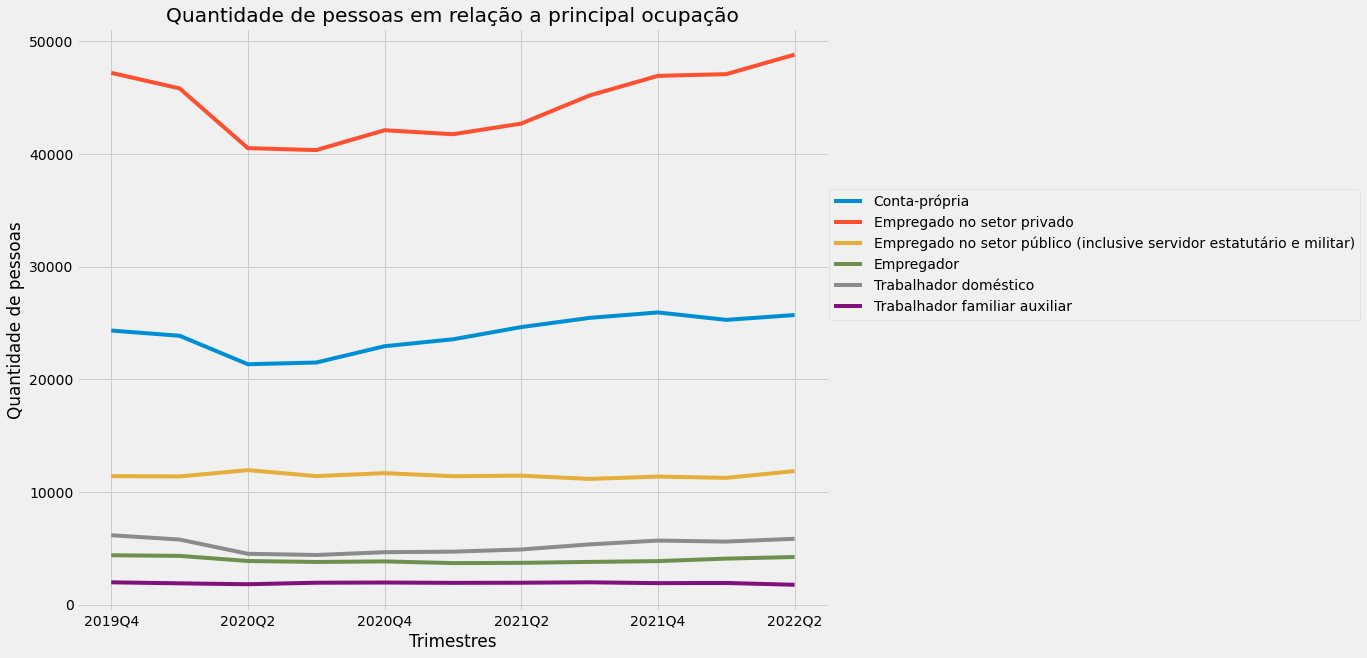

In [13]:
pessoas_empregadas.iloc[:, :-1].plot(kind='line', figsize=(12, 10), title = 'Quantidade de pessoas em relação a principal ocupação',xlabel='Trimestres', ylabel='Quantidade de pessoas')
plt.legend(loc=(1, 0.5))
plt.show()

Pessoas empregadas no setor privado com carteira assinada

In [14]:
pessoas_categoria_emprego = (pd.crosstab(pnadc_completa['ano_tri'], pnadc_completa['VD4009'], values=pnadc_completa['V1028'], aggfunc='sum', margins=True, margins_name='Total') / 1000).drop('Total', axis=0).round(0)

In [15]:
pessoas_categoria_emprego.iloc[-1].sort_values(ascending=False)

VD4009
Total                                                           98269.0
Empregado no setor privado com carteira de trabalho assinada    35782.0
Conta-própria                                                   25714.0
Empregado no setor privado sem carteira de trabalho assinada    13043.0
Militar e servidor estatutário                                   7830.0
Trabalhador doméstico sem carteira de trabalho assinada          4385.0
Empregador                                                       4237.0
Empregado no setor público sem carteira de trabalho assinada     2738.0
Trabalhador familiar auxiliar                                    1772.0
Trabalhador doméstico com carteira de trabalho assinada          1470.0
Empregado no setor público com carteira de trabalho assinada     1298.0
Name: 2022Q2, dtype: float64

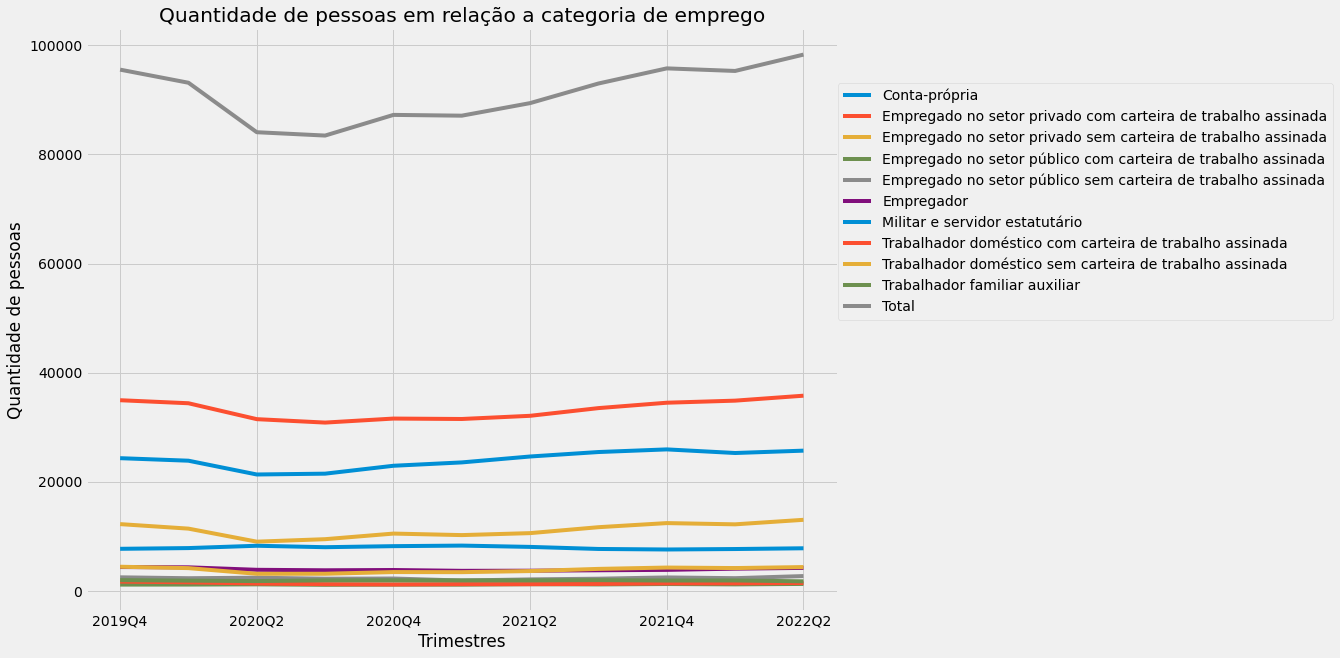

In [16]:
pessoas_categoria_emprego.plot(kind='line', figsize=(12, 10), title = 'Quantidade de pessoas em relação a categoria de emprego',xlabel='Trimestres', ylabel='Quantidade de pessoas')
plt.legend(loc=(1, .5))
plt.show()

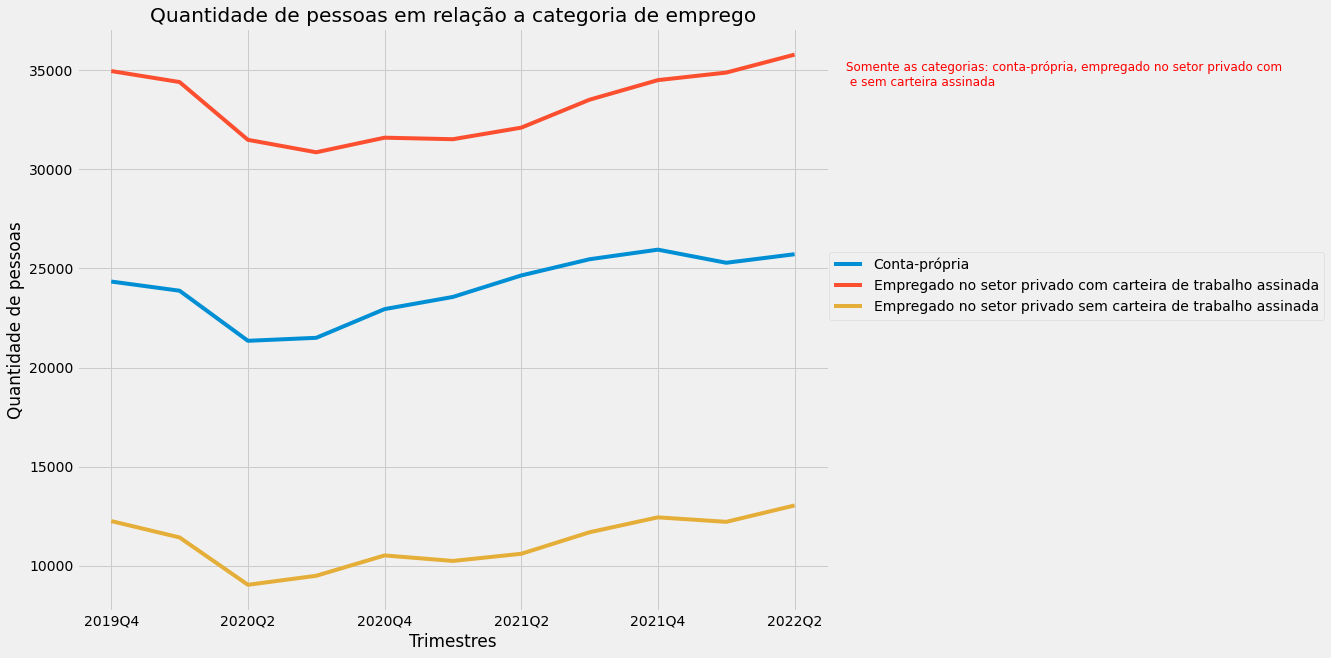

In [17]:
pessoas_categoria_emprego[['Conta-própria', 'Empregado no setor privado com carteira de trabalho assinada', 'Empregado no setor privado sem carteira de trabalho assinada']].plot(kind='line', figsize=(12, 10), title = 'Quantidade de pessoas em relação a categoria de emprego',xlabel='Trimestres', ylabel='Quantidade de pessoas')
plt.text(.97, .8, 'Somente as categorias: conta-própria, empregado no setor privado com \n e sem carteira assinada', fontsize=12, color='red',transform=plt.gcf().transFigure)
plt.legend(loc=(1, .5))
plt.show()

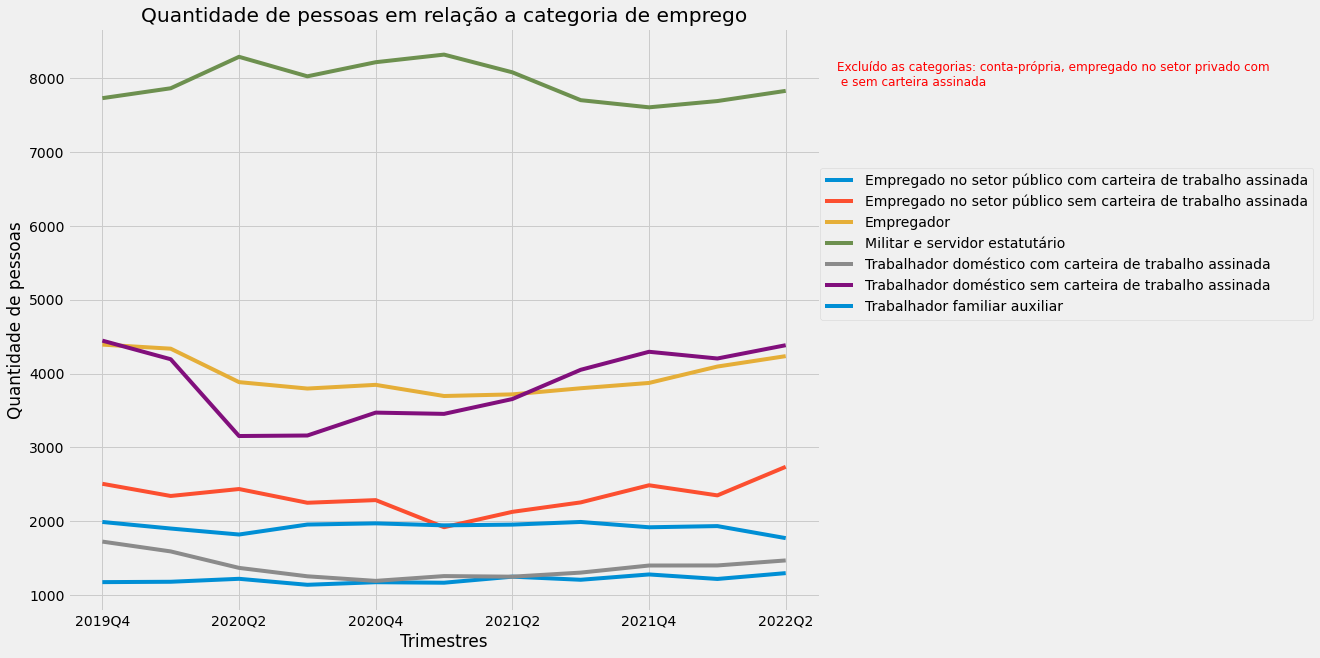

In [18]:
pessoas_categoria_emprego.drop(['Conta-própria', 'Empregado no setor privado com carteira de trabalho assinada', 'Empregado no setor privado sem carteira de trabalho assinada', 'Total'], axis=1).plot(kind='line', figsize=(12, 10), title = 'Quantidade de pessoas em relação a categoria de emprego',xlabel='Trimestres', ylabel='Quantidade de pessoas')
plt.text(.97, .8, 'Excluído as categorias: conta-própria, empregado no setor privado com \n e sem carteira assinada', fontsize=12, color='red',transform=plt.gcf().transFigure)
plt.legend(loc=(1, .5))
plt.show()

Pessoas ocupadas informalmente

> empregado no setor privado sem carteira assinada; ou trabalhador por conta própria sem CNPJ; ou empregador sem CNPJ; ou trabalhador doméstico sem carteira assinada; ou trabalhador familiar auxiliar. 

In [19]:
pnadc_filtroV4019_semcnpj = pnadc_completa[pnadc_completa['V4019'] != 'Sim']

In [20]:
pessoas_ocupacao_informal = (pd.crosstab(pnadc_filtroV4019_semcnpj['ano_tri'], pnadc_filtroV4019_semcnpj['VD4009'], values=pnadc_filtroV4019_semcnpj['V1028'], aggfunc='sum') / 1000).round(0).iloc[:, [0, 2, 5, 8, 9]]
#pessoas_ocupacao_informal['Total'] = pessoas_ocupacao_informal.sum(axis=1)

In [21]:
pessoas_ocupacao_informal

VD4009,Conta-própria,Empregado no setor privado sem carteira de trabalho assinada,Empregador,Trabalhador doméstico sem carteira de trabalho assinada,Trabalhador familiar auxiliar
ano_tri,,,,,
2019Q4,19271.0,12255.0,792.0,4447.0,1991.0
2020Q1,18458.0,11429.0,799.0,4195.0,1902.0
2020Q2,16028.0,9041.0,655.0,3155.0,1821.0
2020Q3,16404.0,9496.0,673.0,3162.0,1956.0
2020Q4,17449.0,10522.0,637.0,3472.0,1972.0
2021Q1,17752.0,10244.0,658.0,3455.0,1945.0
2021Q2,18877.0,10605.0,669.0,3656.0,1955.0
2021Q3,19237.0,11691.0,738.0,4052.0,1991.0
2021Q4,19536.0,12443.0,750.0,4296.0,1919.0


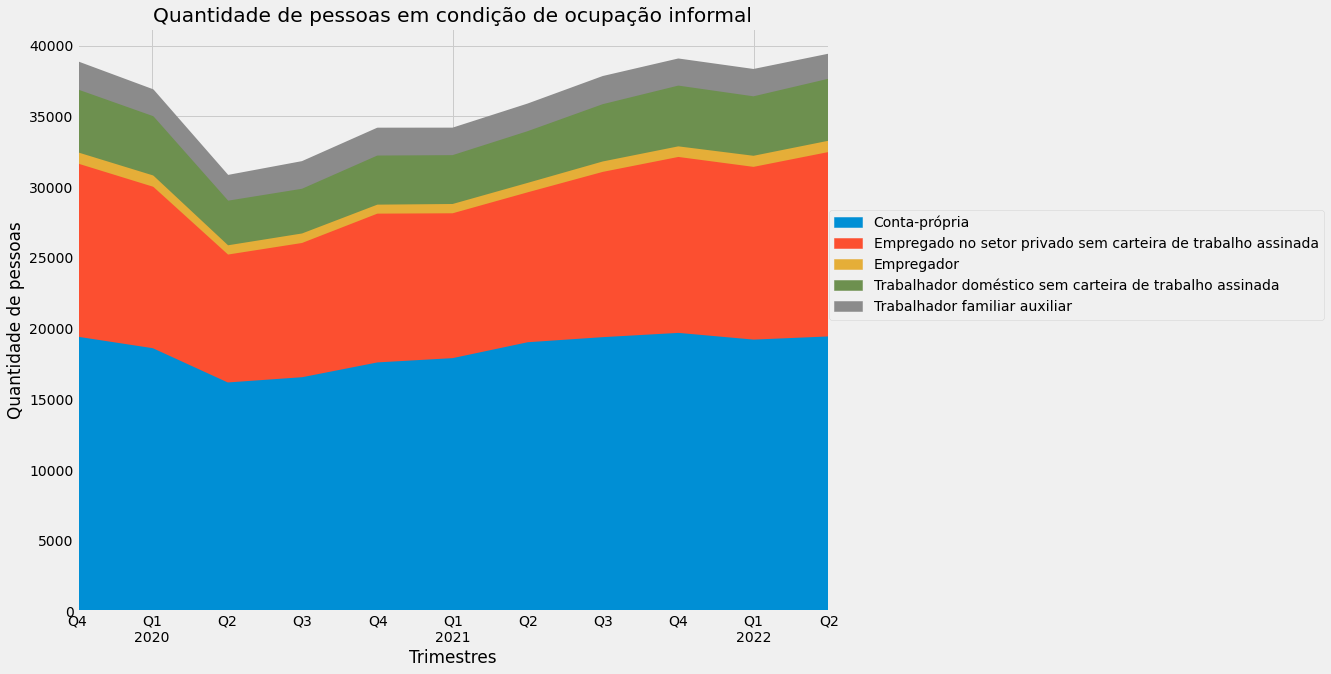

In [22]:
pessoas_ocupacao_informal.plot(kind='area', figsize=(12, 10), title = 'Quantidade de pessoas em condição de ocupação informal',xlabel='Trimestres', ylabel='Quantidade de pessoas')
plt.legend(loc=(1, .5))
plt.show()

Nível de ocupação

In [23]:
taxa_ocupacao = (pessoas_ocupacao[['Pessoas ocupadas', 'Pessoas desocupadas']].div(pessoas_idade_trabalhar[['Total', 'Pessoas na força de trabalho']].values) * 100).round(2)
taxa_ocupacao.columns = ['Taxa de ocupação', 'Taxa de desocupação']

In [24]:
taxa_ocupacao[['Taxa de ocupação']]

,Taxa de ocupação
ano_tri,
2019Q4,56.52
2020Q1,54.96
2020Q2,49.48
2020Q3,49.00
2020Q4,51.11
2021Q1,50.90
2021Q2,52.12
2021Q3,54.09
2021Q4,55.58


Taxa de desocupação

In [25]:
taxa_ocupacao[['Taxa de desocupação']]

,Taxa de desocupação
ano_tri,
2019Q4,11.08
2020Q1,12.37
2020Q2,13.60
2020Q3,14.89
2020Q4,14.18
2021Q1,14.91
2021Q2,14.23
2021Q3,12.64
2021Q4,11.15


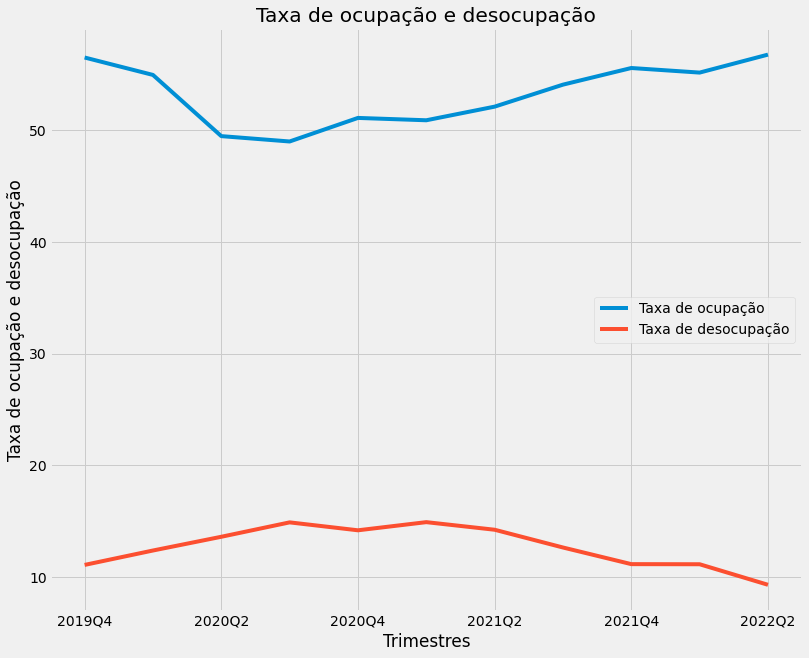

In [26]:
taxa_ocupacao.plot(kind='line', figsize=(12, 10), title = 'Taxa de ocupação e desocupação',xlabel='Trimestres', ylabel='Taxa de ocupação e desocupação')
#plt.ylim(0, 100)
plt.show()

Pessoas subutilizadas na força de trabalho ampliada

> Pessoas de 14 anos ou mais de idade desocupadas, subocupadas por insuficiência de horas trabalhadas ou na força de trabalho potencial na semana de referência 

In [27]:
total_desocupadas = (pd.crosstab(pnadc_completa['ano_tri'], pnadc_completa['VD4002'], values=pnadc_completa['V1028'], aggfunc='sum') / 1000).round(0)['Pessoas desocupadas']
total_subocupadas = (pd.crosstab(pnadc_completa['ano_tri'], pnadc_completa['VD4004A'], values=pnadc_completa['V1028'], aggfunc='sum') / 1000).round(0)['Pessoas subocupadas']
total_forca_potencial = (pd.crosstab(pnadc_completa['ano_tri'], pnadc_completa['VD4003'], values=pnadc_completa['V1028'], aggfunc='sum') / 1000).round(0)['Pessoas fora da força de trabalho e na força de trabalho potencial']

In [28]:
pessoas_subutilizadas = pd.DataFrame({'Pessoas desocupadas': total_desocupadas, 'Pessoas subocupadas': total_subocupadas, 'Pessoas fora da força de trabalho e na força de trabalho potencial': total_forca_potencial})
pessoas_subutilizadas['Total'] = pessoas_subutilizadas.sum(axis=1)

In [29]:
pessoas_subutilizadas

,Pessoas desocupadas,Pessoas subocupadas,Pessoas fora da força de trabalho e na força de trabalho potencial,Total
ano_tri,,,,
2019Q4,11903.0,6857.0,7762.0,26522.0
2020Q1,13148.0,6522.0,8323.0,27993.0
2020Q2,13228.0,5642.0,13668.0,32538.0
2020Q3,14598.0,6273.0,12876.0,33747.0
2020Q4,14412.0,6865.0,11264.0,32541.0
2021Q1,15257.0,7091.0,11308.0,33656.0
2021Q2,14832.0,7644.0,10126.0,32602.0
2021Q3,13453.0,7771.0,9519.0,30743.0
2021Q4,12011.0,7369.0,8964.0,28344.0


<AxesSubplot:title={'center':'Quantidade de pessoas subutilizadas na força de trabalho'}, xlabel='Trimestres', ylabel='Quantidade de pessoas'>

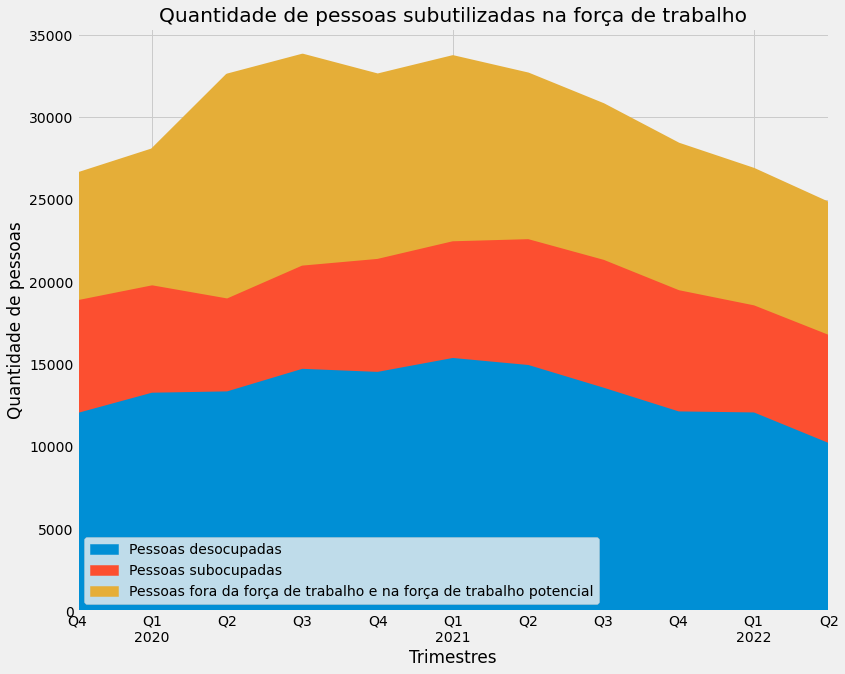

In [30]:
pessoas_subutilizadas.drop('Total', axis=1).plot(kind='area', figsize=(12, 10), title = 'Quantidade de pessoas subutilizadas na força de trabalho',xlabel='Trimestres', ylabel='Quantidade de pessoas')

Taxa composta de subutilização

In [31]:
(total_desocupadas + total_forca_potencial + total_subocupadas) / ((pd.crosstab(pnadc_completa['ano_tri'], pnadc_completa['VD4001'], values=pnadc_completa['V1028'], aggfunc='sum') / 1000).round(0)['Pessoas na força de trabalho']+total_forca_potencial)

ano_tri
2019Q4    0.230266
2020Q1    0.244297
2020Q2    0.293275
2020Q3    0.304266
2020Q4    0.288226
2021Q1    0.296145
2021Q2    0.285127
2021Q3    0.265142
2021Q4    0.242833
2022Q1    0.231982
2022Q2    0.212443
Freq: Q-DEC, dtype: float64

In [32]:
taxa_subutilizacao = pd.DataFrame({'Taxa de subutilização': (pessoas_subutilizadas['Total'].div(pessoas_idade_trabalhar['Pessoas na força de trabalho'] + total_forca_potencial) * 100).round(2)})

In [33]:
taxa_subutilizacao

,Taxa de subutilização
ano_tri,
2019Q4,23.03
2020Q1,24.43
2020Q2,29.33
2020Q3,30.43
2020Q4,28.82
2021Q1,29.61
2021Q2,28.51
2021Q3,26.51
2021Q4,24.28


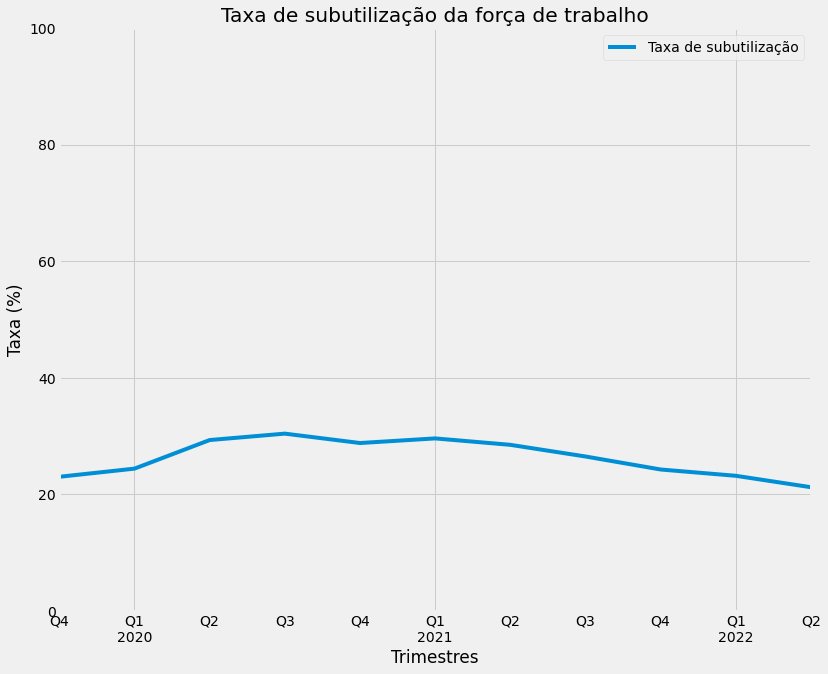

In [55]:
taxa_subutilizacao.plot(kind='line', figsize=(12, 10), title = 'Taxa de subutilização da força de trabalho',xlabel='Trimestres', ylabel='Taxa (%)')
plt.ylim(0, 100)
plt.show()